In [14]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import scipy
from scipy.stats import norm

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
warnings.filterwarnings('ignore')

In [4]:
# Сформируем портфель
tickers = ['DBC','GLD', 'IEF', 'VTI', 'TLT']

# Доли в портфеле
weights = np.array([.075, .075, .15, .3, .4]) 

# Размер инвестиций
initial_investment = 1000000

# Загружаем
portfolio_data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Close']

portfolio_data.index = pd.to_datetime(portfolio_data.index)
#Рассчитываем доходность
returns = portfolio_data.pct_change()

returns.tail()

[*********************100%***********************]  5 of 5 completed


,DBC,GLD,IEF,TLT,VTI
Date,,,,,
2022-12-23,0.018272,0.002998,-0.004527,-0.014660,0.005516
2022-12-27,0.008972,0.008430,-0.008372,-0.019773,-0.004179
2022-12-28,-0.011318,-0.004506,-0.002397,-0.005892,-0.012590
2022-12-29,-0.001226,0.005598,0.004911,0.011351,0.018383
2022-12-30,0.009005,0.004679,-0.004159,-0.011124,-0.002556


<Axes: xlabel='Date'>

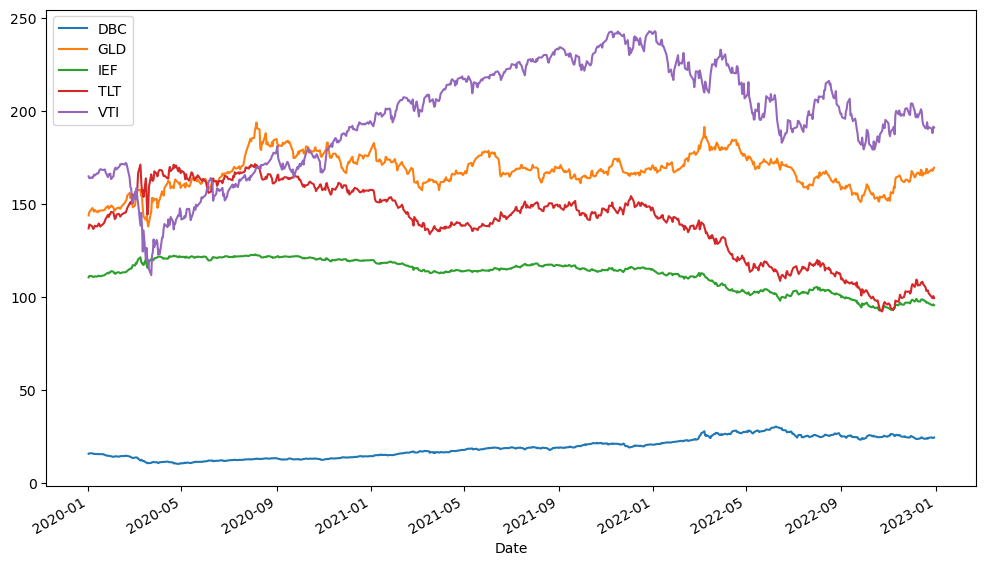

In [50]:
portfolio_data.plot(figsize=(12,7))

In [59]:
snp_data = yf.download('^GSPC', start="2020-01-01", end="2023-01-01")['Close']
snp_data.index = pd.to_datetime(snp_data.index)
returns_snp = snp_data.pct_change()
returns_snp.tail()

[*********************100%***********************]  1 of 1 completed


Date
2022-12-23    0.005868
2022-12-27   -0.004050
2022-12-28   -0.012021
2022-12-29    0.017461
2022-12-30   -0.002541
Name: Close, dtype: float64

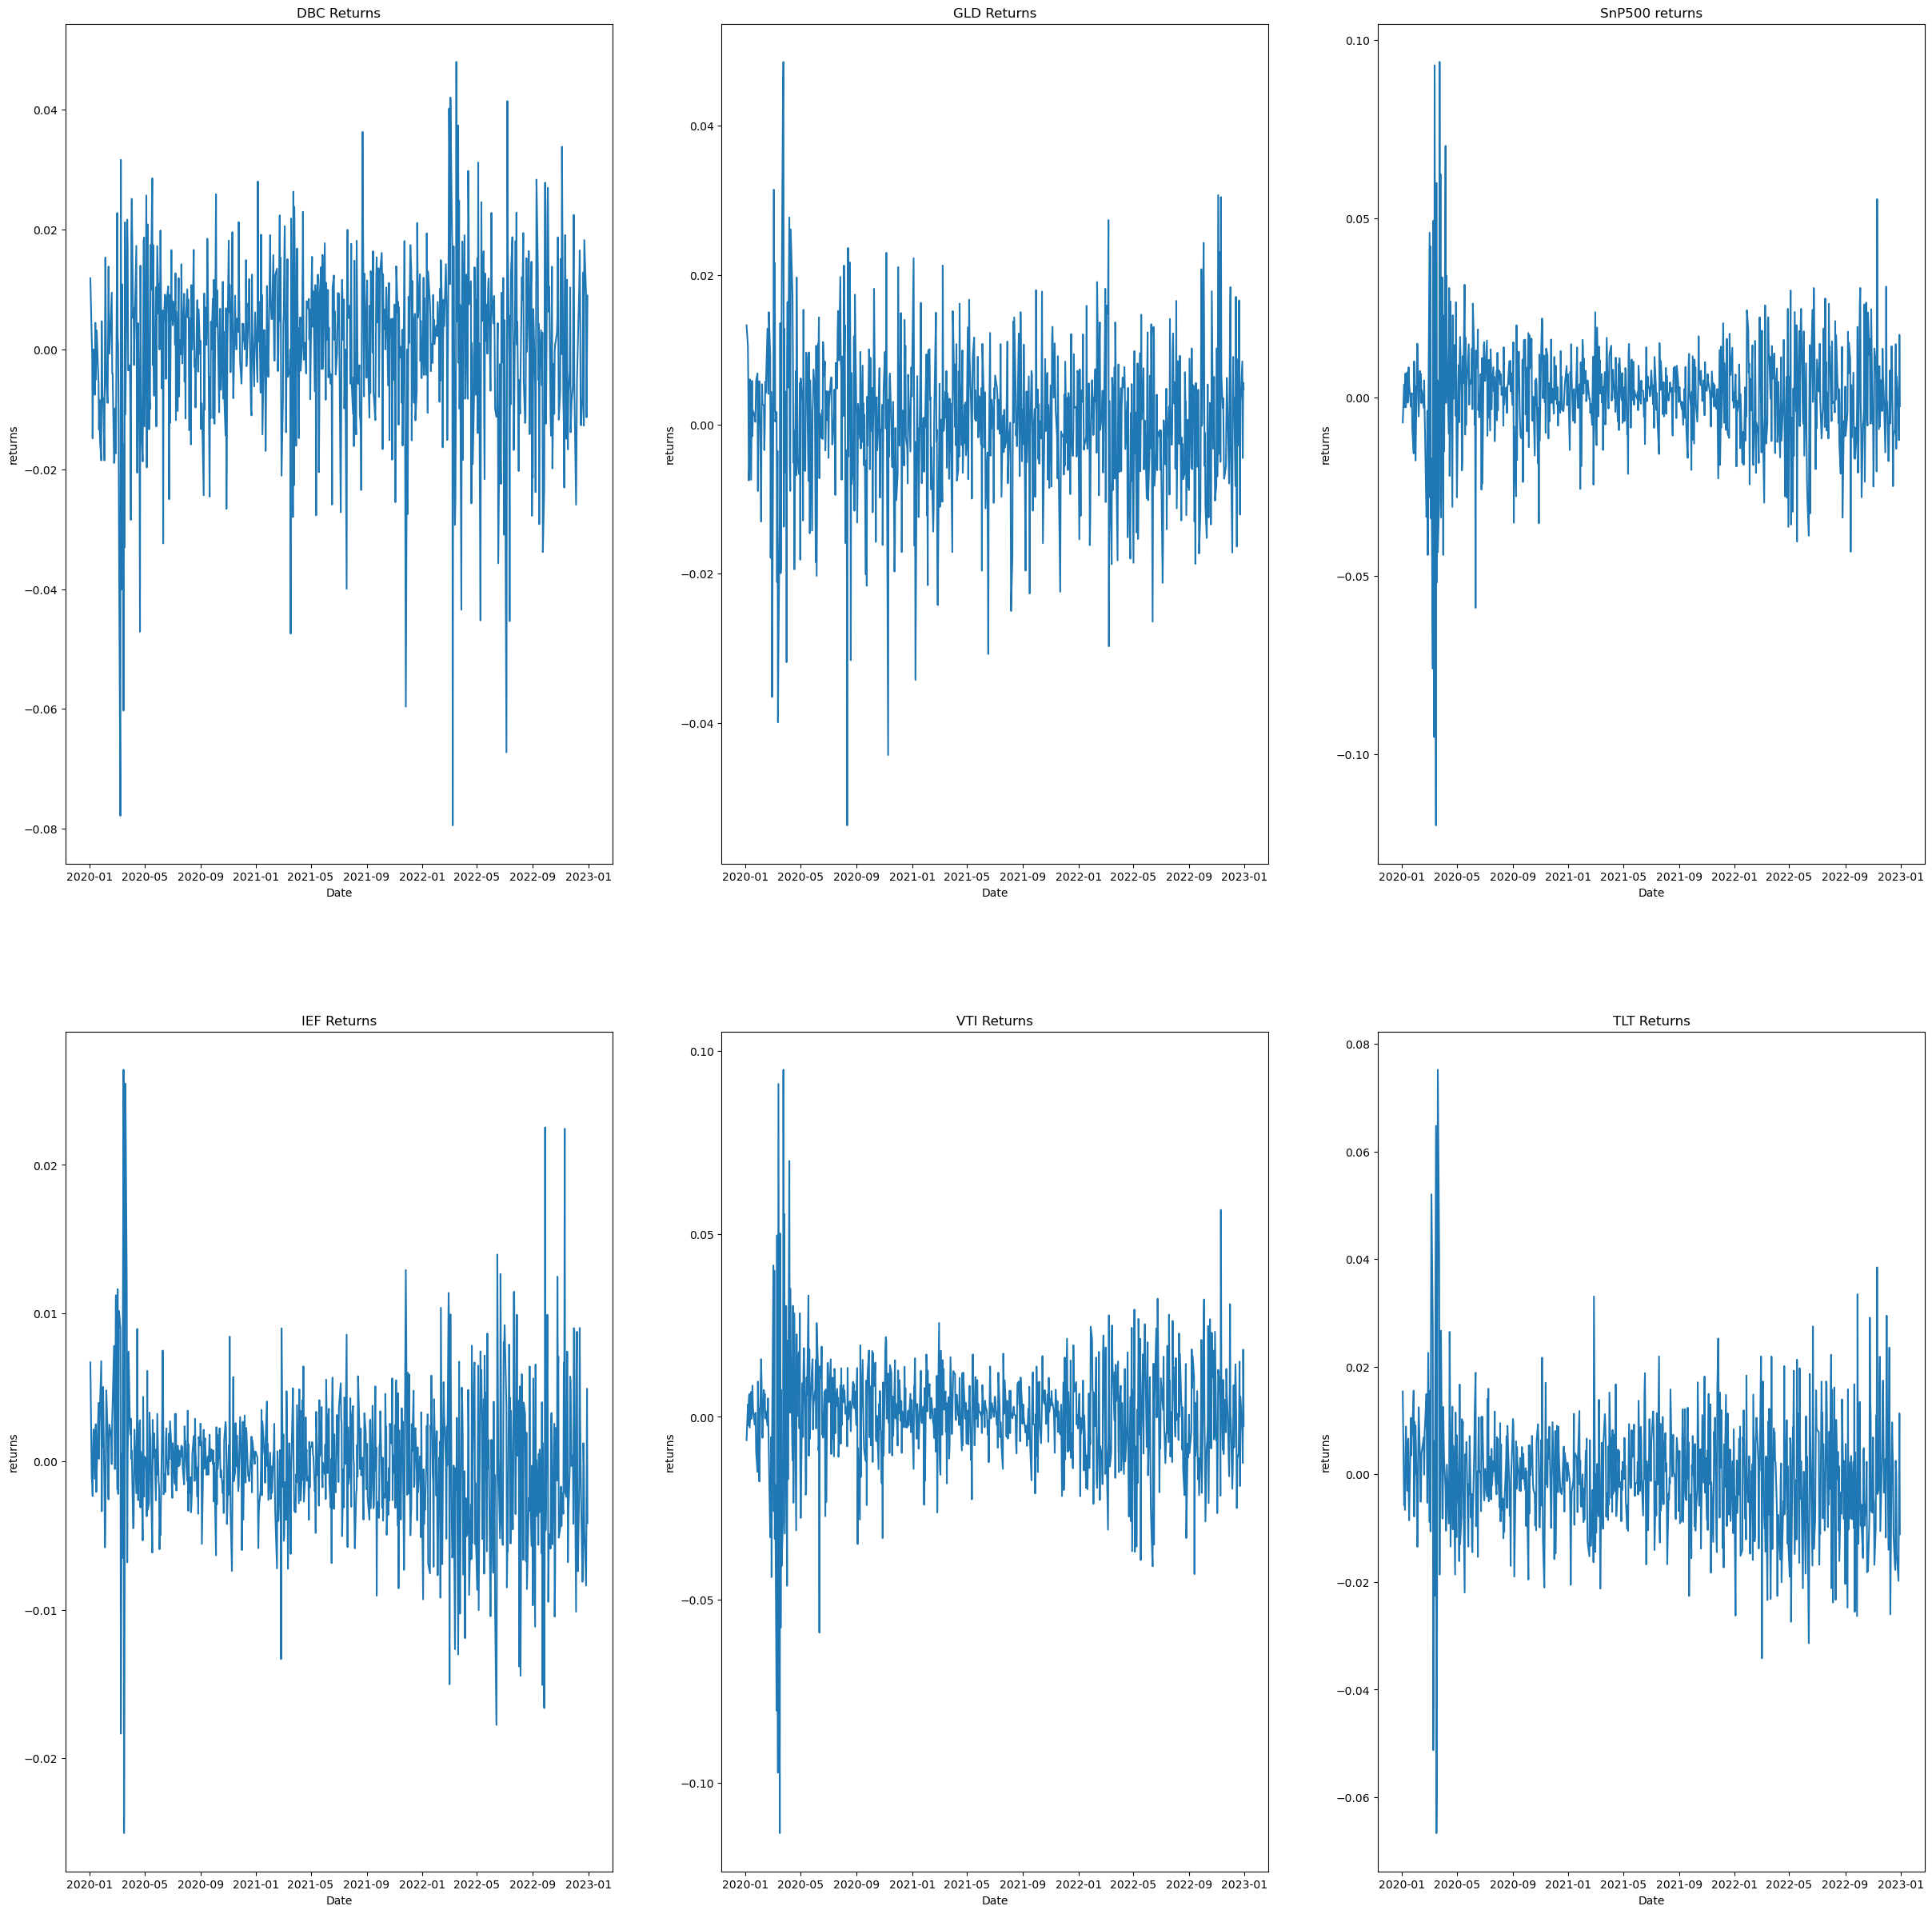

In [60]:
fig, axs = plt.subplots(2, 3, figsize=(30,30))
axs[0, 0].plot(returns['DBC'])
axs[0, 0].set_title('DBC Returns')
axs[0, 1].plot(returns['GLD'])
axs[0, 1].set_title('GLD Returns')
axs[1, 0].plot(returns['IEF'])
axs[1, 0].set_title('IEF Returns')
axs[1, 1].plot(returns['VTI'])
axs[1, 1].set_title('VTI Returns')
axs[1, 2].plot(returns['TLT'])
axs[1, 2].set_title('TLT Returns')
axs[0, 2].plot(returns_snp)
axs[0, 2].set_title('SnP500 returns')
#fig.delaxes(axs[0,2])
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='returns')

In [9]:
#Корреляции
corr_spearman = returns.corr(method='spearman')
corr_spearman.head(10)

,DBC,GLD,IEF,TLT,VTI
DBC,1.000000,0.280058,-0.131074,-0.174568,0.344682
GLD,0.280058,1.000000,0.332803,0.260507,0.135630
IEF,-0.131074,0.332803,1.000000,0.908337,-0.092248
TLT,-0.174568,0.260507,0.908337,1.000000,-0.156111
VTI,0.344682,0.135630,-0.092248,-0.156111,1.000000


In [10]:
#Расчет матрицы ковариации
cov_matrix = returns.cov()
cov_matrix

,DBC,GLD,IEF,TLT,VTI
DBC,0.000206,0.000047,-0.000008,-0.000032,0.000090
GLD,0.000047,0.000106,0.000016,0.000030,0.000029
IEF,-0.000008,0.000016,0.000024,0.000053,-0.000010
TLT,-0.000032,0.000030,0.000053,0.000142,-0.000043
VTI,0.000090,0.000029,-0.000010,-0.000043,0.000262


In [11]:
# mean returns
avg_rets = returns.mean()

# mean returns для портфеля
port_mean = avg_rets.dot(weights)

# standard deviation портфеля
port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# mean инвестиций
mean_investment = (1+port_mean) * initial_investment

# standard deviation инвестиций
stdev_investment = initial_investment * port_stdev

In [15]:
# Задаем доверительный интервал (95%)
conf_level1 = 0.05
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [16]:
#Считаем VaR
var_1d1 = initial_investment - cutoff1
var_1d1

12450.23647203308

1 day VaR @ 95% confidence: 12450.24
2 day VaR @ 95% confidence: 17607.29
3 day VaR @ 95% confidence: 21564.44
4 day VaR @ 95% confidence: 24900.47
5 day VaR @ 95% confidence: 27839.58
6 day VaR @ 95% confidence: 30496.73
7 day VaR @ 95% confidence: 32940.23
8 day VaR @ 95% confidence: 35214.59
9 day VaR @ 95% confidence: 37350.71
10 day VaR @ 95% confidence: 39371.1
11 day VaR @ 95% confidence: 41292.76
12 day VaR @ 95% confidence: 43128.88
13 day VaR @ 95% confidence: 44889.97
14 day VaR @ 95% confidence: 46584.52
15 day VaR @ 95% confidence: 48219.56
16 day VaR @ 95% confidence: 49800.95
17 day VaR @ 95% confidence: 51333.64
18 day VaR @ 95% confidence: 52821.88
19 day VaR @ 95% confidence: 54269.32
20 day VaR @ 95% confidence: 55679.15
21 day VaR @ 95% confidence: 57054.15
22 day VaR @ 95% confidence: 58396.79
23 day VaR @ 95% confidence: 59709.24
24 day VaR @ 95% confidence: 60993.45
25 day VaR @ 95% confidence: 62251.18
26 day VaR @ 95% confidence: 63484.0
27 day VaR @ 95% confid

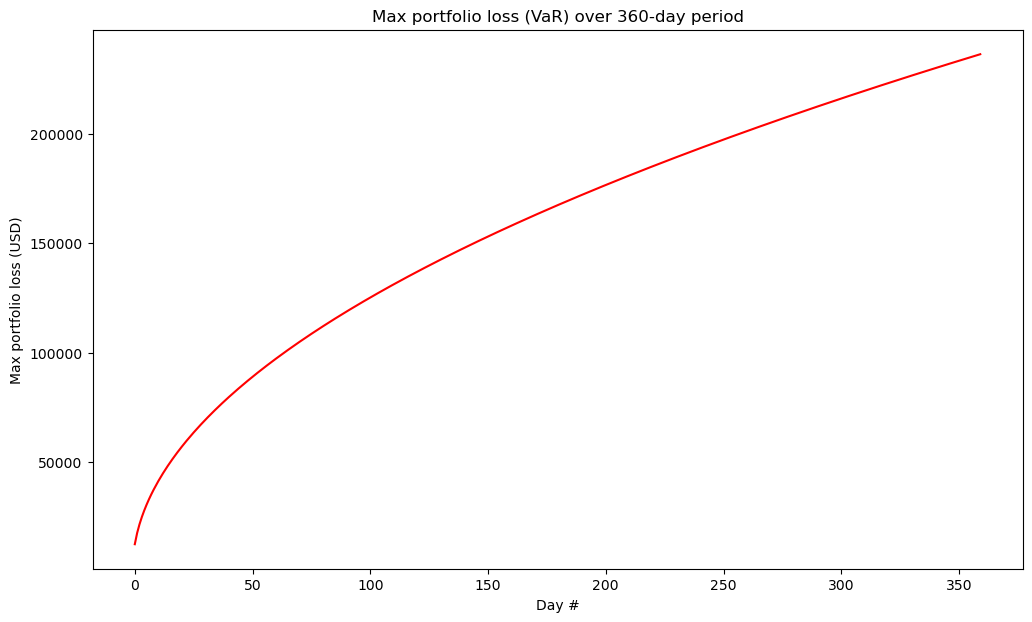

In [86]:
# n Day VaR
var_array = []
num_days = int(360)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# график
plt.figure(figsize=(12,7))
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 360-day period")
plt.plot(var_array, "r")

In [66]:
# Сформируем альтернативный портфель с NILSY
alt_tickers_1 = ['NILSY','GLD', 'IEF', 'VTI', 'TLT']

alt_weights_1 = np.array([.075, .075, .15, .3, .4]) 

alt_portfolio_data = yf.download(alt_tickers_1, start="2020-01-01", end="2023-01-01")['Close']

alt_portfolio_data.index = pd.to_datetime(alt_portfolio_data.index)

alt_returns = alt_portfolio_data.pct_change()

alt_cov_matrix = alt_returns.cov()

alt_avg_rets = alt_returns.mean()

alt_port_mean = alt_avg_rets.dot(weights)

alt_port_stdev = np.sqrt(alt_weights_1.T.dot(alt_cov_matrix).dot(alt_weights_1))

alt_mean_investment = (1+alt_port_mean) * initial_investment

alt_stdev_investment = initial_investment * alt_port_stdev

conf_level1 = 0.05
alt_cutoff1 = norm.ppf(conf_level1, alt_mean_investment, alt_stdev_investment)
alt_var_1d1 = initial_investment - alt_cutoff1
alt_var_1d1

[*********************100%***********************]  5 of 5 completed


17413.3770116159

<Axes: xlabel='Date'>

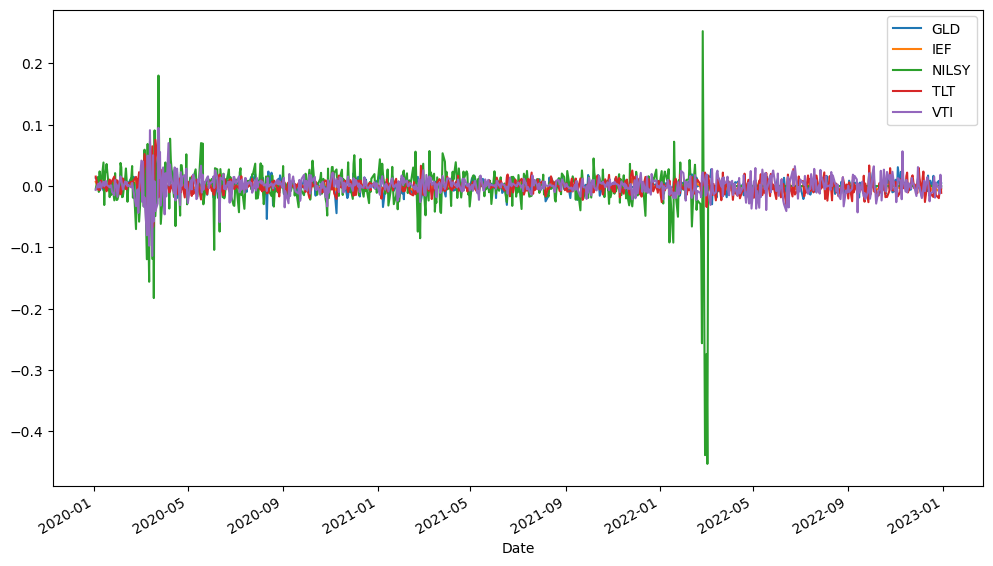

In [70]:
alt_returns.plot(figsize=(12,7))

In [68]:
# Сформируем альтернативный портфель с AAL.L
alt_tickers_2 = ['AAL.L','GLD', 'IEF', 'VTI', 'TLT']

alt_weights_2= np.array([.075, .075, .15, .3, .4]) 

alt_portfolio_data_2 = yf.download(alt_tickers_2, start="2020-01-01", end="2023-01-01")['Close']

alt_portfolio_data_2.index = pd.to_datetime(alt_portfolio_data_2.index)

alt_returns_2 = alt_portfolio_data_2.pct_change()

alt_cov_matrix_2 = alt_returns_2.cov()

alt_avg_rets_2 = alt_returns_2.mean()

alt_port_mean_2 = alt_avg_rets_2.dot(weights)

alt_port_stdev_2 = np.sqrt(alt_weights_2.T.dot(alt_cov_matrix_2).dot(alt_weights_2))

alt_mean_investment_2 = (1+alt_port_mean_2) * initial_investment

alt_stdev_investment_2 = initial_investment * alt_port_stdev_2

conf_level1 = 0.05
alt_cutoff1_2 = norm.ppf(conf_level1, alt_mean_investment_2, alt_stdev_investment_2)
alt_var_1d1_2 = initial_investment - alt_cutoff1_2
alt_var_1d1_2

[*********************100%***********************]  5 of 5 completed


13184.65323311754

<Axes: xlabel='Date'>

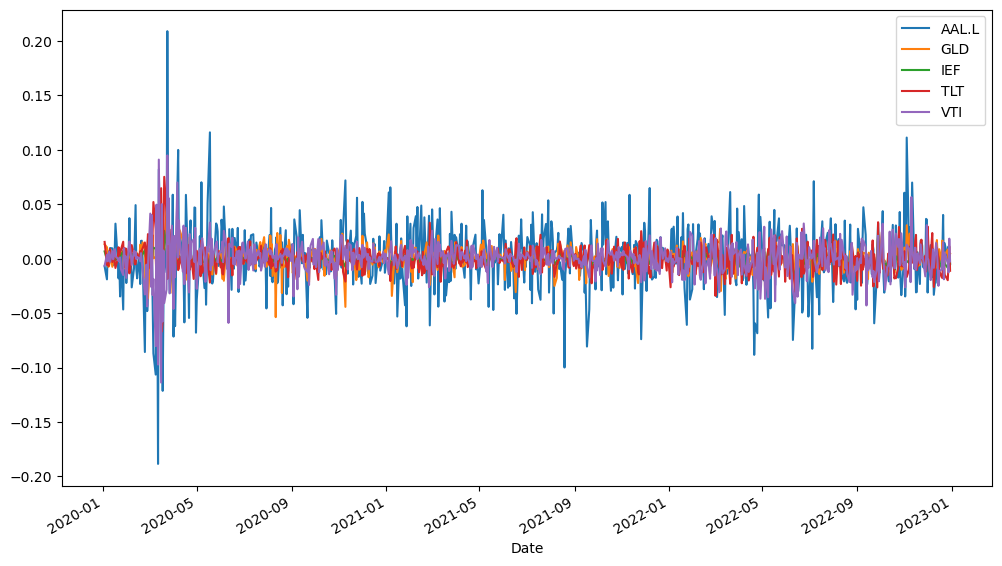

In [71]:
alt_returns_2.plot(figsize=(12,7))

1 day VaR @ 95% confidence: 17413.38
2 day VaR @ 95% confidence: 24626.23
3 day VaR @ 95% confidence: 30160.85
4 day VaR @ 95% confidence: 34826.75
5 day VaR @ 95% confidence: 38937.49
6 day VaR @ 95% confidence: 42653.89
7 day VaR @ 95% confidence: 46071.47
8 day VaR @ 95% confidence: 49252.47
9 day VaR @ 95% confidence: 52240.13
10 day VaR @ 95% confidence: 55065.93
11 day VaR @ 95% confidence: 57753.64
12 day VaR @ 95% confidence: 60321.71
13 day VaR @ 95% confidence: 62784.82
14 day VaR @ 95% confidence: 65154.89
15 day VaR @ 95% confidence: 67441.72
16 day VaR @ 95% confidence: 69653.51
17 day VaR @ 95% confidence: 71797.19
18 day VaR @ 95% confidence: 73878.7
19 day VaR @ 95% confidence: 75903.15
20 day VaR @ 95% confidence: 77874.99
21 day VaR @ 95% confidence: 79798.12
22 day VaR @ 95% confidence: 81675.98
23 day VaR @ 95% confidence: 83511.62
24 day VaR @ 95% confidence: 85307.78
25 day VaR @ 95% confidence: 87066.89
26 day VaR @ 95% confidence: 88791.15
27 day VaR @ 95% confi

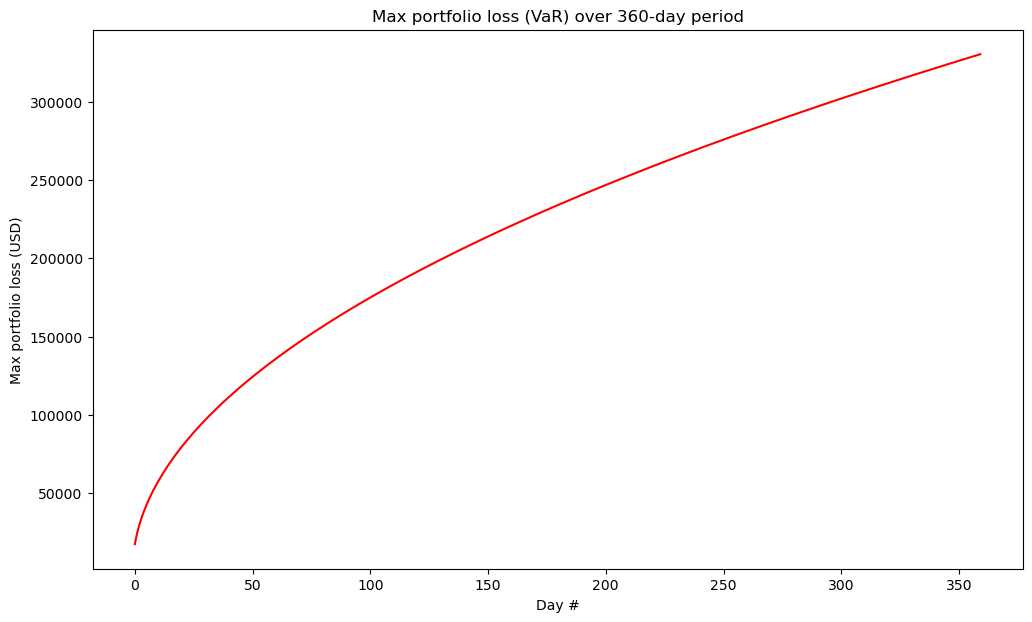

In [85]:
# 360 Day VaR
var_array_1 = []
num_days = int(360)
for x in range(1, num_days+1):    
    var_array_1.append(np.round(alt_var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(alt_var_1d1 * np.sqrt(x),2)))

# график
plt.figure(figsize=(12,7))
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 360-day period")
plt.plot(var_array_1, "r")

1 day VaR @ 95% confidence: 13184.65
2 day VaR @ 95% confidence: 18645.92
3 day VaR @ 95% confidence: 22836.49
4 day VaR @ 95% confidence: 26369.31
5 day VaR @ 95% confidence: 29481.78
6 day VaR @ 95% confidence: 32295.67
7 day VaR @ 95% confidence: 34883.31
8 day VaR @ 95% confidence: 37291.83
9 day VaR @ 95% confidence: 39553.96
10 day VaR @ 95% confidence: 41693.53
11 day VaR @ 95% confidence: 43728.55
12 day VaR @ 95% confidence: 45672.98
13 day VaR @ 95% confidence: 47537.94
14 day VaR @ 95% confidence: 49332.46
15 day VaR @ 95% confidence: 51063.94
16 day VaR @ 95% confidence: 52738.61
17 day VaR @ 95% confidence: 54361.72
18 day VaR @ 95% confidence: 55937.75
19 day VaR @ 95% confidence: 57470.57
20 day VaR @ 95% confidence: 58963.56
21 day VaR @ 95% confidence: 60419.67
22 day VaR @ 95% confidence: 61841.51
23 day VaR @ 95% confidence: 63231.38
24 day VaR @ 95% confidence: 64591.35
25 day VaR @ 95% confidence: 65923.27
26 day VaR @ 95% confidence: 67228.8
27 day VaR @ 95% confi

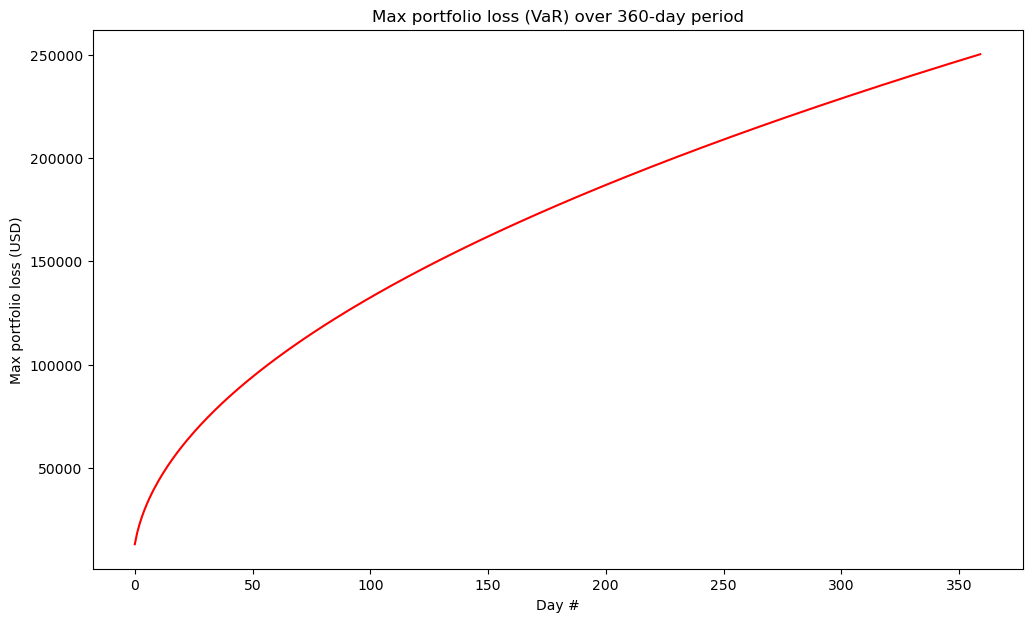

In [84]:
# 360 Day VaR
var_array_2 = []
num_days = int(360)
for x in range(1, num_days+1):    
    var_array_2.append(np.round(alt_var_1d1_2 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 95% confidence: " + str(np.round(alt_var_1d1_2 * np.sqrt(x),2)))

# график
plt.figure(figsize=(12,7))
plt.xlabel("Day #")
plt.ylabel("Max portfolio loss (USD)")
plt.title("Max portfolio loss (VaR) over 360-day period")
plt.plot(var_array_2, "r")

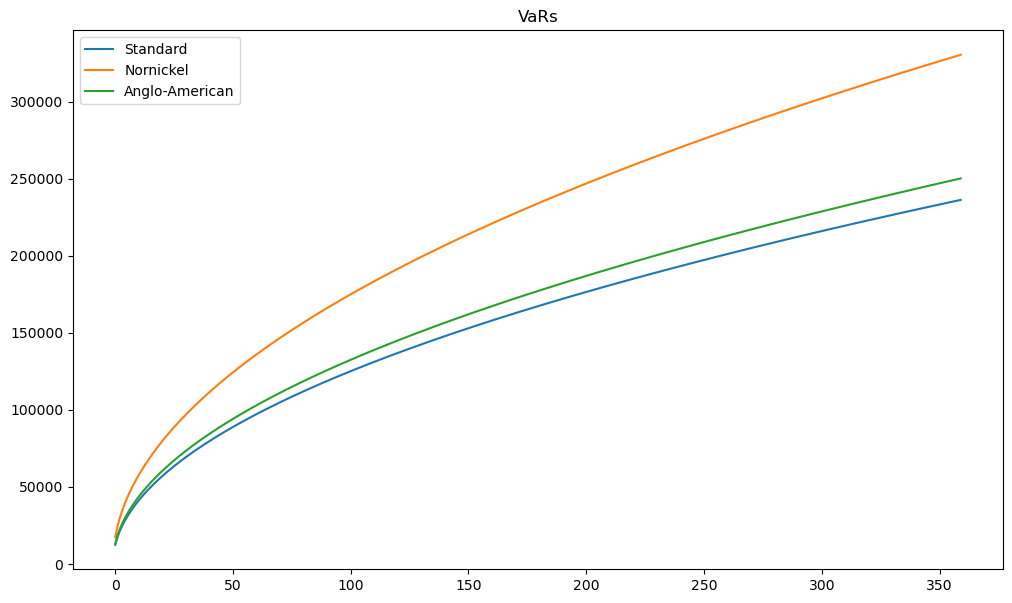

In [95]:
plt.figure(figsize=(12,7))
plt.plot(var_array, label = 'Standard')
plt.plot(var_array_1, label = 'Nornickel')
plt.plot(var_array_2, label = 'Anglo-American')
plt.title("VaRs")
plt.legend()
plt.show()